# Ford GoBike Data Exploration
## by Xuan Kuang

## Preliminary Wrangling

> This document explores a dataset including information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from Jan, 2018 to Dec, 2018.

In [1]:
# import all packages and set plots to be embedded inline
import glob
import os
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loop and read all csv files in datasets folder
path = './datasets'
files = glob.glob(os.path.join(path, "*.csv"))
data_list = []

for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    data_list.append(df)

#concat all the data into one dataframe
bikes = pd.concat(data_list, axis=0, ignore_index=True)

In [3]:
#export dataframe to csv file
bikes.to_csv('bikes_raw.csv', index = False)

In [4]:
#read data from csv
bikes=pd.read_csv('bikes_raw.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
#check the info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [6]:
#check user type value
bikes.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [7]:
#make copy of dataset for cleaning
bikes_clean=bikes.copy()

In [8]:
#drop the unuseful columns
bikes_clean=bikes_clean.drop(['start_station_id','start_station_name','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','bike_share_for_all_trip'],axis=1)

In [9]:
#change data type to datetime for columns start_time and end_time
bikes_clean.start_time=pd.to_datetime(bikes_clean.start_time)
bikes_clean.end_time=pd.to_datetime(bikes_clean.end_time)

#change data type to category for user_type with order
cat_user=['Subscriber','Customer']
bikes_clean['user_type'] = pd.Categorical(bikes_clean['user_type'], ordered=True, categories=cat_user)

In [10]:
#confirm data type updated
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 6 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_latitude   float64       
 4   start_station_longitude  float64       
 5   user_type                category      
dtypes: category(1), datetime64[ns](2), float64(2), int64(1)
memory usage: 72.9 MB


In [11]:
#check null data
bikes_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
user_type                  0
dtype: int64

In [12]:
#check if any duplicates
bikes_clean[bikes_clean.duplicated()]

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,user_type


- the datasets is for the San Francisco Bay area, and Latitude and longitude coordinates of San Francisco are: 37.773972, -122.431297

In [13]:
#extract month value from start_time column and order by month
bikes_clean['month'] = bikes_clean.start_time.dt.month
bikes_clean['month'] = bikes_clean['month'].apply(lambda x: calendar.month_abbr[x])
cat_month = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bikes_clean['month'] = pd.Categorical(bikes_clean['month'], ordered=True, categories=cat_month)

#extract day of week value from start_time column and order by day of week
bikes_clean['day'] = bikes_clean.start_time.dt.day_name()
bikes_clean['day'] = bikes_clean['day'].apply(lambda x: x[:4] if x=='Thursday' else x[:3])
cat_day = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
bikes_clean['day'] = pd.Categorical(bikes_clean['day'], ordered=True, categories=cat_day)

#extract hour from start_time column
bikes_clean['hour'] = bikes_clean.start_time.dt.hour
bikes_clean['hour'] = bikes_clean['hour'].astype('category')

In [14]:
bikes_clean.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,user_type,month,day,hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,37.761420,-122.426435,Subscriber,Jan,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,37.795392,-122.394203,Customer,Jan,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,37.348759,-121.894798,Customer,Jan,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,37.773793,-122.421239,Customer,Jan,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,37.776435,-122.426244,Subscriber,Jan,Wed,19


In [15]:
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_latitude   float64       
 4   start_station_longitude  float64       
 5   user_type                category      
 6   month                    category      
 7   day                      category      
 8   hour                     category      
dtypes: category(4), datetime64[ns](2), float64(2), int64(1)
memory usage: 78.2 MB


In [16]:
#confirm the day of week value
bikes_clean.day.value_counts()

Tue     319332
Wed     316374
Thur    314124
Mon     294573
Fri     290390
Sat     175614
Sun     153314
Name: day, dtype: int64

In [17]:
#confirm month counts
bikes_clean.month.value_counts()

Oct    201458
Jul    199222
Jun    195968
Aug    192162
Sep    186217
May    179125
Nov    134135
Dec    131363
Apr    131169
Mar    111382
Feb    106718
Jan     94802
Name: month, dtype: int64

In [18]:
#confirm hour counts
bikes_clean.hour.value_counts()

17    220014
8     206729
18    171335
9     160974
16    143045
19    103930
7     101793
15     96747
12     90140
13     87780
10     84232
14     83207
11     79511
20     66566
21     46956
6      36359
22     31056
23     18645
0      10234
5      10027
1       5884
2       3697
4       2740
3       2120
Name: hour, dtype: int64

In [19]:
#confirm no null value
bikes_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
user_type                  0
month                      0
day                        0
hour                       0
dtype: int64

### Structure of the dataset

> There are 1,863,721 bike riding records in the dataset with 9 features (duration_sec, start_time, end_time, start_station_latitude, start_station_longitude, user_type, month, day, and hour). Most variables are category type, which are created during the data wrangling.
> The variables month, day, user_type are ordered factor variables with the following levels.
> 
> (earlier) ——> (later)
> - month: Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
> - day: Mon, Tue, Wed, Thur, Fri, Sat, Sun
> 
> (more) ——> (less)
> - user_type: Subscriber, Customer

### Main feature(s) of interest in the dataset

> I'm most interested in figuring out when and where bikes are in high demand during the hour/day of week and between different location.
> Moreover, I'm looking for user type patterns crossed the demand of bikes, duration, time of usage, and location of start station.

### Features in the dataset expect to support the investigation into the feature(s) of interest.

> I expect that the start time (month, weekday/weekend, hour) will have the strongest effect on the demand of bike rides.
> Also I expect that there will be differences on duration and time of usage between different user type.

## Univariate Exploration

> I'll start by looking at the distribution duration of bike rides.

**Duration**

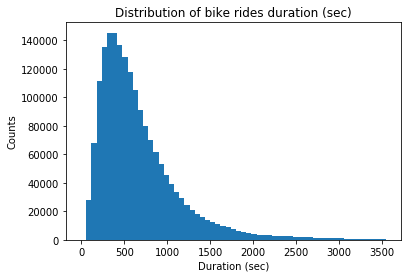

In [20]:
#plot distribution of bike rides duration
bins_edges=np.arange(0,3600,60)
plt.hist(bikes_clean.duration_sec,bins=bins_edges);
plt.title('Distribution of bike rides duration (sec)');
plt.xlabel('Duration (sec)');
plt.ylabel('Counts');

> Since there are many outliers above the most of the duration in the datasets, I will only view the data with duration less than 3600s(one hour) to look into the distribution of most data.
>
> Duration has a long-tailed distribution, with a lot of bike rides records on short duration, and few on long duration. The right-skewed distribution with one peak between around 500, which is about 8 mins. 
>
> We can see that most of the bike rides duration is no longer than 1800 seconds (30 mins) and usually lasts about 6 to 15 mins. This can be explained by below two facts:
> - Pricing: For customers(non-subscribers), single trip up to 30 mins are free of additional charge, and there is additional charge for additional 15 mins. Only subscribers with month/annual pass receive 45-min rides for free. People will tend to spend at least less than 30 mins to avoid addition charge.
> - Usage: Commuting may probably be the most common usage for the bike riding system. Therefore, the duration is usually short due to the short distance between users' home and workplace/school.

> Next up, we will check the variable `user_type` to see if the pricing has effect on the distribution on user types.

**User Type**

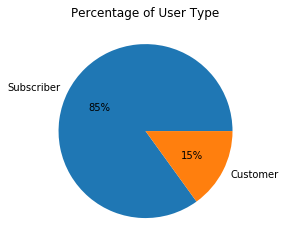

In [21]:
#plot the pie chart for user type
(bikes_clean.user_type.value_counts()).plot(kind = 'pie',autopct='%.0f%%')
plt.title('Percentage of User Type');
plt.ylabel('');

> There are 85% of the users in the dataset using bike rides are Subscriber, which is over 5 times of Customer at 15%.
> 
> For long term or frequently used riders, annual/month pass will has competitive price per ride compared to non-subcribed riders.

> Next up, I'll now look at the other features in the data to see if any of them effects the bike demand.

**Month (extract from start_time)**

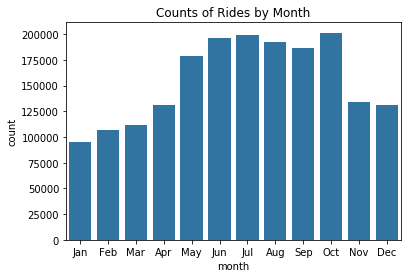

In [22]:
#plot the bar chart to see the counts by month
default_color = sb.color_palette()[0]
sb.countplot(data = bikes_clean, x = 'month', color = default_color);
plt.title('Counts of Rides by Month');

> From the above plot we can find that there are higher demands of bike rides in May to October compared to other months in 2018.We may consider the difference on demand between months is related to climate.People may usually choose other transportation methods other than bike during the rainy or cold weather.
- Temperature: In San Francisco Bay area, June to November were warmer than the other months.
- Rainfall: A lot of rain (rainy season) falls in the months: November to March, and dry periods from May to October.
> 
> While noticed that the number of bike usage suddenly went off in Nov, which may relate to the air pollution caused by the California wildfire in Nov, 2018.

**Day and Hour(extract from start_time)**

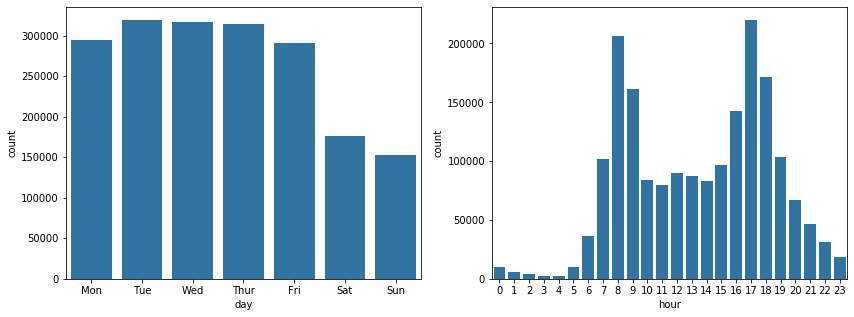

In [23]:
# plot bar chart to see the distribution of day and hour
#set columns number and figure size.
fig, ax = plt.subplots(ncols=2, figsize = [14,5])
#plot the bar chart to see the counts by day of week
sb.countplot(data = bikes_clean, x = 'day', color = default_color,ax=ax[0]);

#plot the bar chart to see the counts by hour
sb.countplot(data = bikes_clean, x = 'hour', color = default_color,ax=ax[1]);

> - Day of Week: The number of bike usage is about 300k from Monday to Friday, while it went down almost half to around 150k on Saturday and Sunday. It looks like the bike demand at weekends is not as high as weekdays.
> 
> - Hour: The peak hours are obvious shown from the above chart. We can see the number of bike usage during 8am - 9am and 4pm - 6pm is significantly higher than the other period.
> 
> From the above two plots, we can find that the peak hours for bike usage is likely to be 8am - 9am and 4pm - 6pm at weekdays. It is likely that people took bike rides for commuting. I will look into the number of bike usage on both of day and hour together in the next section Bivariate Exploration to confirm.
> 
> Next, I will see if there is any difference on the bike demand between different `location`.

**Location**

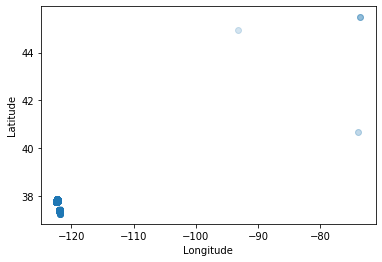

In [24]:
#some data are outside the San Francisco Bay area
plt.scatter(x=bikes_clean.start_station_longitude,y=bikes_clean.start_station_latitude,alpha=0.1);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

In [25]:
#filter out the data outside the San Francisco Bay area
bikes_clean=bikes_clean[bikes_clean.start_station_longitude<-120]

- Ford GoBike is operated in San Francisco Bay Area under three main areas in 2018: San Jose, San Francisco and East Bay.
- Based on the longitude and latitude of start station, create the new column location with values San Jose,San Francisc and East Bay.

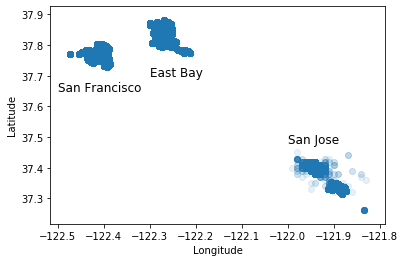

In [26]:
#plot scatter chart to see the location distribution
plt.scatter(x=bikes_clean.start_station_longitude,y=bikes_clean.start_station_latitude,alpha=0.1);
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.text(-122,37.48, 'San Jose', fontsize=12);
plt.text(-122.5,37.65, 'San Francisco', fontsize=12);
plt.text(-122.3,37.7, 'East Bay', fontsize=12);

In [27]:
#create new column location
bikes_clean['location']=(
    np.where(
        bikes_clean['start_station_longitude'] <-122.35, 
        'San Francisco', 
        np.where(bikes_clean['start_station_longitude'] >-122.1, 'San Jose', 'East Bay')))

#change data type of location to category with order
cat_location = ['San Francisco','East Bay','San Jose']
bikes_clean['location'] = pd.Categorical(bikes_clean['location'], ordered=True, categories=cat_location)

In [28]:
#confirm new column created with correct data type
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863710 entries, 0 to 1863720
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_latitude   float64       
 4   start_station_longitude  float64       
 5   user_type                category      
 6   month                    category      
 7   day                      category      
 8   hour                     category      
 9   location                 category      
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 94.2 MB


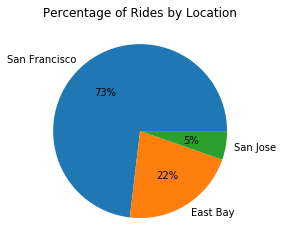

In [29]:
#plot the pie chart for percentage of rides by location
(bikes_clean.location.value_counts()).plot(kind = 'pie',autopct='%.0f%%')
plt.title('Percentage of Rides by Location');
plt.ylabel('');

> There are 73% of the bike rides in San Francisco, which covered most of the bike rides in the dataset, while East Bay is 22%, followed by San Jose of 5%.
> 
> This shows that the bike demands of San Francisco is higher than the other two regions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The pair of variables start_station_latitude and start_station_longitude were drawed in the scatterplot to discover the station location. And there are points with longitudes greater than -80, which don't belong to San Francisco Bay area. After remove these records, there were 3 clusters recognized as San Francisco, East Bay and San Jose. A new variable location was created with these values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the duration_sec variable, a number of outlier points were identified. In order to look into the distribution of most data, I have plotted the data with duration less than 3600s(one hour). And I found out that Duration has a long-tailed distribution, with a lot of bike rides records on short duration, and few on long duration. The right-skewed distribution with one peak between around 500, which is about 8 mins.
> 
> The month of bike rides was extracted from the start_time variable. There were more rides between May and October. This may relate to the differences of temperature and rainfall between months. Also there was wildfire in Nov, 2018 in California, which coincides with the bike usage falled down in November.
> 
> The day and hour of bike rides were extracted from the start_time variable. There were more rides at weekdays, during 8am - 9am and 4pm - 6pm. It is likely that people took bike rides for commuting so that the demand of bikes in both rush hours and weekdays is higher than other time.

## Bivariate Exploration

> To start off with, I want to look at the ride counts of variables `hour` and `day` to see if there is any difference on the hourly bike usage between weekday and weekend.

**Hour and Day (extract from start_time)**

In [30]:
#create column weekday_or_weekend based on day of week
bikes_clean['weekday_or_weekend']=bikes_clean['day'].apply(lambda x: 'weekend' if (x =='Sat' or x =='Sun') else 'weekday')

#create sub df for plot
#ride counts grouped by hour and weekday/weekend
bikes_clean_hour_day=bikes_clean.groupby(['hour','weekday_or_weekend']).count().reset_index()[['hour','weekday_or_weekend','day']]
bikes_clean_hour_day.head()

,hour,weekday_or_weekend,day
0,0,weekday,5741
1,0,weekend,4493
2,1,weekday,2963
3,1,weekend,2921
4,2,weekday,1916


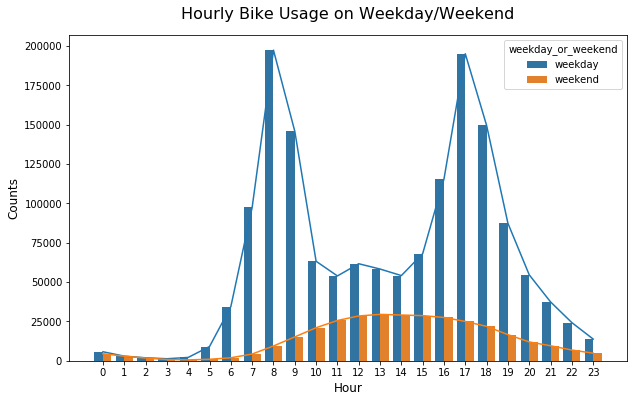

In [31]:
#plot bar and line chart for counts of ride based on start hour and weekday/weekend
plt.figure(figsize = [10, 6])
sb.countplot(x='hour',hue='weekday_or_weekend',data=bikes_clean)
sb.lineplot(x='hour',y='day',hue='weekday_or_weekend',data=bikes_clean_hour_day,legend=False);
plt.title("Hourly Bike Usage on Weekday/Weekend", fontsize=16, y=1.03);
plt.xlabel("Hour", fontsize=12);
plt.ylabel("Counts", fontsize=12);

> Peak hours of bike rides are 7 am-9 am and 4 pm-6 pm. And there are more people taking bike rides on weekdays compared to weekends.
> 
> Peak hours is not observed on weekends. Users might ride bikes on weekends for leisure purpose. Thus, there is no clear peak hours.
> 
> From the above plots, it is most probably that the main purpose for users to ride bikes is commuting. This can explain why there is higher demand during the rush hours at weekdays.

> Now, let's take a second look at the user type patterns by different `month`, `day`, `hour`, `location` and `duration`.

**User_Type and Month (extract from start_time)**

In [32]:
#create sub dataframe for ride counts group by month and user type
bikes_clean_month_user=bikes_clean.groupby(['month','user_type']).count().reset_index()[['month','user_type','day']]
bikes_clean_month_user.head()

,month,user_type,day
0,Jan,Subscriber,82458
1,Jan,Customer,12344
2,Feb,Subscriber,91857
3,Feb,Customer,14861
4,Mar,Subscriber,95075


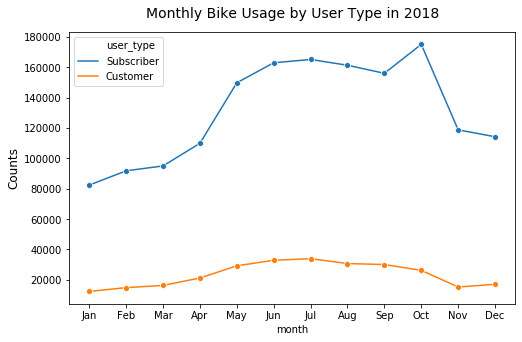

In [33]:
#plot line chart for counts of ride based on month and user type
plt.figure(figsize = [8, 5])
sb.lineplot(x='month',y='day',hue='user_type',data=bikes_clean_month_user, marker='o');
plt.title("Monthly Bike Usage by User Type in 2018", fontsize=14, y=1.03);
plt.ylabel("Counts", fontsize=12);

> For both user types, the number of bike usage increased from 2018/01 to 2018/07, and started with a decreased trend afterwards.
> 
> The number of bike usage by subscribers went up from about 80k to about 170k. It increased 90k rides, over 1 times compared to January. While there is only a little changes for Customer compared to Subscriber, which went from 10k to about 30k with only 20k rides. But compared to January, the number of rides increased about 2 times.
> 
> The rise in October for Subscriber seems abnormal, while there was a decrease trend started from July. Moreover, this rise did not occur with the user type Customer. Probability there is some kind of reason, such as promotion which only apply to Subscriber in October, caused the rise.

**User_Type and Day (extract from start_time)**

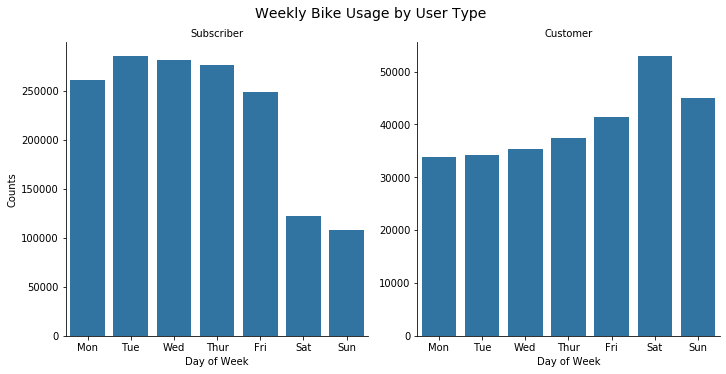

In [34]:
#plot bar chart for counts of ride based on hour and user type
g = sb.catplot(data=bikes_clean, x='day', col="user_type", kind='count', sharey = False,
            color = default_color)
g.set_axis_labels("Day of Week", "Counts")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Bike Usage by User Type', y=1.03, fontsize=14);

> There is difference on user type pattern for which day of week people using the bike sharing service. Subscribers are most probably daily work/school commuters who use the system at weekdays maily. On the other hand, customers are most probably used the bike sharing system on holiday or weekend for leisure purpose . 

**User_Type and Hour (extract from start_time)**

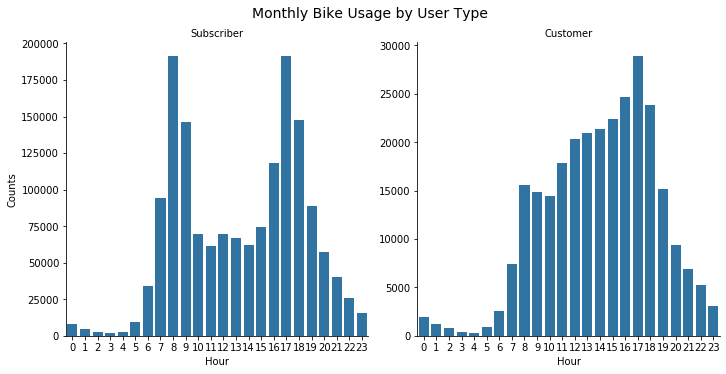

In [35]:
#plot bar chart for counts of ride based on hour and user type
g = sb.catplot(data=bikes_clean, x='hour', col="user_type", kind='count', sharey = False,
            color = default_color)
g.set_axis_labels("Hour", "Counts")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Bike Usage by User Type', y=1.03, fontsize=14);

> There is also differences on the hour when the bikes were mostly used under different user type. Subscribers used the bikes maily during 7am - 9am and 4pm - 6pm probably for conmmuting. And customers used bikes mainly between 8 am - 7 pm, reaching the peak hour around 5pm, who are most probably the visitors using the bikes with no specific time.

**User Type and Location (extract from start_station_latitude and start_station_longitude)**

In [36]:
#create sub data frame with the records of ride counts proportion under subscriber for line plot
bikes_clean_prop=bikes_clean.groupby(['location','user_type']).count()[['day']]
bikes_clean_prop['proportion']=bikes_clean_prop.groupby(level=0).apply(lambda x: x / float(x.sum()))
bikes_clean_prop=bikes_clean_prop.reset_index()
bikes_clean_prop=bikes_clean_prop[bikes_clean_prop.user_type=='Subscriber']
bikes_clean_prop

,location,user_type,day,proportion
0,San Francisco,Subscriber,1147930,0.842455
2,East Bay,Subscriber,347739,0.865317
4,San Jose,Subscriber,87874,0.885416


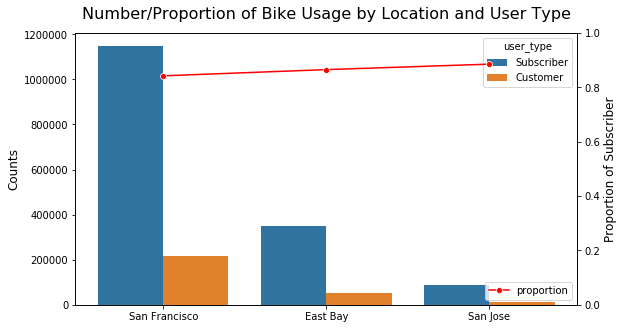

In [37]:
#plot bar chart for counts of ride based on location and user type
fig, ax1 = plt.subplots(figsize=(9, 5))
sb.countplot(x='location',hue='user_type',data=bikes_clean,ax=ax1)
ax1.set_title("Number/Proportion of Bike Usage by Location and User Type", fontsize=16, y=1.03);
ax1.set_xlabel('');
ax1.set_ylabel("Counts", fontsize=12);

#plot line chart for proportion of subscribers
ax2 = ax1.twinx();
sb.lineplot(x='location',y='proportion',data=bikes_clean_prop,sort=False, legend='brief',marker='o',color='r',ax=ax2);
ax2.set_ylabel('Proportion of Subscriber', fontsize=12);
ax2.set_ylim([0,1]);
ax2.legend(['proportion'],loc='lower right')

> From the bar chart, we can see there is higher demand of bike rides for both user types in San Francisco compared to East Bay and San Jose.
> 
> And from the line plot, it shows the proportion of ride counts by Subscriber, which is 84.2% in San Francisco, 86.5% in East Bay, 88.5% in San Jose. 
> 
> There is no much difference for the proportion of user types between locations. The subscribers covered most of the bike users in all of the three locations.

**User_Type and Duration**

In [38]:
#statistics of duration by user type
bikes_clean.groupby('user_type').duration_sec.describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Subscriber,1583543.0,668.786961,1367.820830,61.0,330.0,515.0,784.0,86281.0
Customer,280167.0,1922.779528,5046.305212,61.0,581.0,947.0,1571.0,86366.0


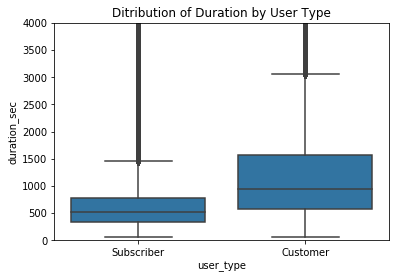

In [39]:
#plot box plot with duration under 4000s by user type
sb.boxplot(data = bikes_clean, x = 'user_type', y = 'duration_sec',color = default_color);
plt.title('Ditribution of Duration by User Type')
plt.ylim([0,4000]);

> Subscribers tend to make lots of short rides in bicycle, with a median abount 500s (8 mins). Customers tend to spend longer rides with a median about 1000s (15 mins). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> About the differences on bike usage based on start hour and weekday/weekend:
- Weekday: Peak hours of bike rides are 7 am-9 am and 4 pm-6 pm. And there are more people taking bike rides on weekdays compared to weekends. It seems that the main purpose for users to ride bikes might be for commuting.
- Weekend: Peak hours is not observed on weekends. And the number of bike usage is much less than weekdays.
> 
> About the differences of bike usage based on user types:
- Subscriber:  Subscribers are daily commuters, who used bike rides mostly around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly the rush hour for commuting (8-9am and 5-6pm). Subscribers tend to make lots of short rides in bicycle, with a median of 8 minutes. This should depend on the short disance between their workplace/school and their living palces. The number of subscribers is in order of San Francisco > East Bay > San Jose. And they are the majority of the users in all of the three locations up to about 85%.
- Customer: As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays. And they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). They tend to take longer ride at the median about 15 mins instead of short trips for more likely the leisure purpose. The order of number of customers is same as subscribers in order of San Francisco > East Bay > San Jose.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was an odd ride increase during October, but only for the subscribers, for which there is no clear reason, maybe related to any promotion only for subscribers which caused the increase of bike usage. In the next month, November, there was a sudden ride decrease, which could be related to the wildfires in California which caused the air pollution.

## Multivariate Exploration

> In this section I will further explore the dataset on the `user type patterns` by ①adding `weekday/weekend` to investigate the distribution of `duration`, and ②adding `day of week` to investigate the distribution of `hourly bike usage`.

**User_Type and Weekday/Weekend and Duration**

In [40]:
#statistics of duration by user type and weekday_or_weekend
bikes_clean.groupby(['user_type','weekday_or_weekend']).duration_sec.describe()

count         mean          std   min  \
user_type  weekday_or_weekend                                              
Subscriber weekday             1352558.0   652.458077  1291.574914  61.0   
           weekend              230985.0   764.402533  1745.729976  61.0   
Customer   weekday              182224.0  1752.251586  4911.600086  61.0   
           weekend               97943.0  2240.048589  5273.173344  61.0   

                                 25%     50%     75%      max  
user_type  weekday_or_weekend                                  
Subscriber weekday             330.0   513.0   774.0  86205.0  
           weekend             328.0   530.0   855.0  86281.0  
Customer   weekday             541.0   862.0  1413.0  86003.0  
           weekend             684.0  1146.0  1827.0  86366.0

C:\Users\90712\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


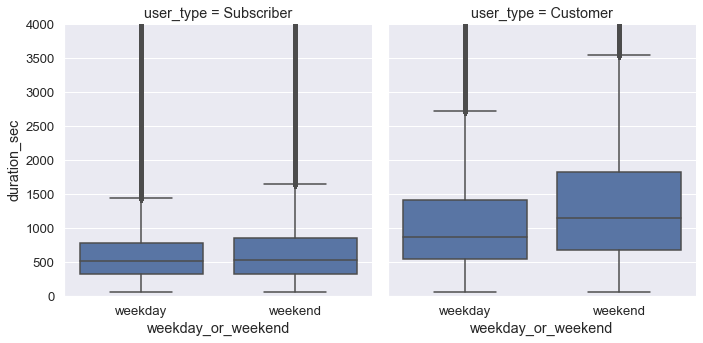

In [41]:
#draw box plot to see the distribution of duration by user type and weekday/weekend
sb.set(font_scale=1.2);
g = sb.FacetGrid(data = bikes_clean, col = 'user_type', height = 5, ylim=[0,4000]);
g.map(sb.boxplot, 'weekday_or_weekend', 'duration_sec');

> - Subscriber: When looking into the variable weekday_or_weekend, there is only slightly increase on the duration of weekend compared to weekday. In general, subscribers tend to make shorter rides than customers at the median about 8 mins.
> - Customer: Customers took longer ride at weekends than weekdays. At weekends, the median is about 1200s (20mins), and it is about 900s (15mins) at weekdays. The median of duration during both of the period are significantly higher than subscribers.

**User_Type and Day and Hour**

In [42]:
#create sub data frame for user type subscriber
bikes_clean_subscriber=bikes_clean.query('user_type == "Subscriber"').groupby(["hour", "day"])["duration_sec"].count().reset_index()
bikes_clean_subscriber=bikes_clean_subscriber.pivot("hour", "day", "duration_sec")

#create sub data frame for user type customer
bikes_clean_customer=bikes_clean.query('user_type == "Customer"').groupby(["hour", "day"])["duration_sec"].count().reset_index()
bikes_clean_customer=bikes_clean_customer.pivot("hour", "day", "duration_sec")

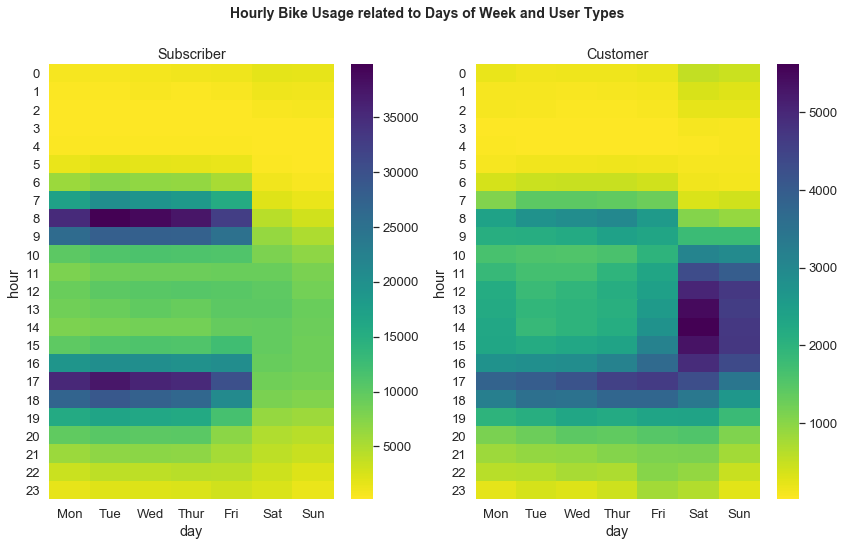

In [43]:
#set figure size and title
plt.figure(figsize=(14,8));
plt.suptitle('Hourly Bike Usage related to Days of Week and User Types', fontsize=14, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1);
sb.heatmap(bikes_clean_subscriber,cmap = 'viridis_r');
plt.title("Subscriber");
plt.yticks(rotation=0);

# heatmap for customers
plt.subplot(1, 2, 2);
sb.heatmap(bikes_clean_customer,cmap = 'viridis_r');
plt.title("Customer");
plt.yticks(rotation=0);

> From the above plot, it clearly clarifies the user type patterns for the purpose of bike usage, and shows when the high demand of bike rides is.
- Subscribers use the bike sharing system mainly on weekdays:
  - weekdays: Most bike rides happened around 7am-9am and 4pm-6pm
> weekends: The number of bike rides dropped significantly, and no peak hours observed
- Customers use the bike sharing system more often on weekends:
  - weekdays: most bike rides happened around 8am-9am and 4pm-6pm, and there are more usage around 4pm-6pm compared to 8am-9am. However, the number of usage is much less than subscribers in the same period.
  - weekends: most bike rides happened between 10am - 6pm, and the number of usage is significantly higher compared to weekdays and also much more higher than the subscribers in the same period.
> 
> Most of the subscribers are using the bike sharing system maily for commuting, and they are more likely to be the citizens in the related location. That can explain why more subscribers took use of the bike sharing system in the rush hours of weekdays rather than weekends.
> 
> On the other hand, most of the customers used the bike sharing system maily for leisure purpose, and they are more likely to be the visitors in those locations. That can explain why more customers took use of the bike sharing system in the daytime on weekends, and relatively less of them took bike rides on weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Plotting a heatmap of when bikes are high in demand by day of week and hour shed a new light on the user type patterns. Plotting counts of bike usage by hour and day of week separately in Bivariate Exploration section, gave the impression that the demand for bikes of customers is quite high at peak hour around 5pm which is not entirely true. The trend within weekdays for customers follows the one for subscribers who rent bikes mainly around commute hours (7-9am and 4-6pm). For customers, as the findings in Bivariate Exploration, most of the bike rides happened on weekends, but the time period mainly between 10am - 6pm which was not visible in previous Bivariate Exploration section .

### Were there any interesting or surprising interactions between features?

> The user patterns in the duration of weekday/weekend usage surprised me that, with the time limit 45mins per ride for subscribers, the duration is much shorter than customers (30mins per ride). And there is no big difference on duration at weekdays or weekends for subscribers, both are at the median around 8 mins. It is likely that subscribers are mainly the citizens lived in that region, so they will use bikes more on commuting rather than taking longer ride at weekend for visiting.
> 
> On the other hand, customers, who is maily the visitors, spent more time on single bike ride, especially at weekends. It is likely that they are taking more advantage of bike sharing system for leisure purpose at weekends. Visitors usually enjoy their trips, and will not rush to destinations like the commuters do.

In [44]:
#export cleaned dataset to csv file
bikes_clean.to_csv('bikes_clean.csv',index=False)